Co trzeba zrobić?
*   usunąć "?" values
*   dla każdej metody wybierania kluczowych cech stworzyć 4 datasety i na ich podstawie trenować modele
*   przydałobysię usunąć outliers tylko pojawia się poroblem z równoczęsnym usunięciem odpowiadających rekordów z y

**Import of data**

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
communities_and_crime = fetch_ucirepo(id=183)

# data (as pandas dataframes)
X = communities_and_crime.data.features
y = communities_and_crime.data.targets

print(y)

# metadata
print(communities_and_crime.metadata)

# variable information
print(communities_and_crime.variables)

      ViolentCrimesPerPop
0                    0.20
1                    0.67
2                    0.43
3                    0.12
4                    0.03
...                   ...
1989                 0.09
1990                 0.45
1991                 0.23
1992                 0.19
1993                 0.48

[1994 rows x 1 columns]
{'uci_id': 183, 'name': 'Communities and Crime', 'repository_url': 'https://archive.ics.uci.edu/dataset/183/communities+and+crime', 'data_url': 'https://archive.ics.uci.edu/static/public/183/data.csv', 'abstract': 'Communities within the United States. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1994, 'num_features': 127, 'feature_types': ['Real'], 'demographics': ['Race', 'Age', 'Income', 'Occupation'], 'target_col': ['ViolentCrimesPerPop'], 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data exploration**

In [4]:
X.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,?,0.02,0.12,0.45,?,?,?,?,0.00,?
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,?,0.01,0.21,0.02,?,?,?,?,0.00,?
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,?,0.02,0.39,0.28,?,?,?,?,0.00,?
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,?,0.04,0.09,0.02,?,?,?,?,0.00,?


In [5]:
y.head()

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 127 entries, state to PolicBudgPerPop
dtypes: float64(99), int64(2), object(26)
memory usage: 1.9+ MB


In [7]:
X.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# No missing values
counter = 0
for i in X.isnull().sum():
  if i > 0:
    counter += 1
print(counter)

counter1 = 0
for i in y.isnull().sum():
  if i > 0:
    counter1 += 1
print(counter1)

0
0


In [9]:
# # Deleting duplicates
# X = X.drop_duplicates()
# y = y.drop_duplicates()

In [10]:
# # Deleting outliers
# from scipy.stats import zscore

# z_scores = np.abs(zscore(X.select_dtypes(include=[float, int])))
# data_no_outliers = X[(z_scores < 3).all(axis=1)]

In [ ]:
X.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Checking if the whole dataset is numerical
is_numeric = X.applymap(lambda x: isinstance(x, (int, float))).all().all()

print("Is the dataset fully numeric?", is_numeric)

<ipython-input-11-2f01b4e7cc88>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  is_numeric = X.applymap(lambda x: isinstance(x, (int, float))).all().all()


Is the dataset fully numeric? False


In [12]:
# Printing non-numerical columns
non_numeric_info = {}

for col in X.columns:
    if not X[col].map(lambda x: isinstance(x, (int, float))).all():
        non_numeric_info[col] = X[col].apply(type).unique()

# Display non-numeric columns and their types
for column, types in non_numeric_info.items():
    print(f"Column '{column}' contains non-numerical values of types: {[t.__name__ for t in types]}")

Column 'county' contains non-numerical values of types: ['str']
Column 'community' contains non-numerical values of types: ['str']
Column 'communityname' contains non-numerical values of types: ['str']
Column 'OtherPerCap' contains non-numerical values of types: ['str']
Column 'LemasSwornFT' contains non-numerical values of types: ['str']
Column 'LemasSwFTPerPop' contains non-numerical values of types: ['str']
Column 'LemasSwFTFieldOps' contains non-numerical values of types: ['str']
Column 'LemasSwFTFieldPerPop' contains non-numerical values of types: ['str']
Column 'LemasTotalReq' contains non-numerical values of types: ['str']
Column 'LemasTotReqPerPop' contains non-numerical values of types: ['str']
Column 'PolicReqPerOffic' contains non-numerical values of types: ['str']
Column 'PolicPerPop' contains non-numerical values of types: ['str']
Column 'RacialMatchCommPol' contains non-numerical values of types: ['str']
Column 'PctPolicWhite' contains non-numerical values of types: ['str

In [13]:
# Just a simple check
X['county'].unique()

array(['?', '5', '95', '7', '21', '87', '187', '1', '27', '129', '31',
       '193', '29', '680', '23', '3', '19', '35', '790', '53', '9', '119',
       '99', '17', '11', '135', '133', '45', '39', '61', '43', '157',
       '15', '13', '37', '107', '89', '41', '93', '71', '590', '55',
       '101', '75', '57', '63', '760', '69', '25', '830', '77', '155',
       '151', '123', '113', '49', '139', '169', '630', '79', '510', '65',
       '81', '105', '141', '33', '59', '131', '173', '109', '153', '103',
       '820', '750', '770', '740', '163', '97', '85', '121', '91', '73',
       '215', '181', '125', '690', '650', '127', '143', '660', '735',
       '147', '670', '683', '111', '67', '550', '117', '570', '800',
       '810', '700', '165', '167', '710', '145', '730', '840', '775'],
      dtype=object)

In [14]:
# Replacing missing values with mean values

X.replace("?", np.nan, inplace=True)

for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:  # Only numeric columns
        # Calculate the mean of the column, ignoring NaN values
        mean_value = X[col].mean()
        # Replace NaN with the mean value
        X[col].fillna(mean_value, inplace=True)

# Display the modified dataset
print("Dataset after replacing '?' with the mean of the respective columns:")
print(X)


Dataset after replacing '?' with the mean of the respective columns:
      state county community        communityname  fold  population  \
0         8    NaN       NaN         Lakewoodcity     1        0.19   
1        53    NaN       NaN          Tukwilacity     1        0.00   
2        24    NaN       NaN         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1989     12    NaN       NaN    TempleTerracecity    10        0.01   
1990      6    NaN       NaN          Seasidecity    10        0.05   
1991      9      9     80070        Waterburytown    10        0.16   
1992     25     17     72600          Walthamcity    10        0.08   
1993      6    NaN       NaN          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  \
0       

<ipython-input-14-090519ebd739>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace("?", np.nan, inplace=True)
<ipython-input-14-090519ebd739>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(mean_value, inplace=True)
<ipython-input-14-090519ebd739>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [15]:
# Just a simple check

X.replace("?", np.nan, inplace=True)

for col in X.columns:
    if X[col].isnull().any():
        print(f"Column '{col}' contains NaN values or '?'")
    else:
        print(f"Column '{col}' does not contain NaN or '?'")


Column 'state' does not contain NaN or '?'
Column 'county' contains NaN values or '?'
Column 'community' contains NaN values or '?'
Column 'communityname' does not contain NaN or '?'
Column 'fold' does not contain NaN or '?'
Column 'population' does not contain NaN or '?'
Column 'householdsize' does not contain NaN or '?'
Column 'racepctblack' does not contain NaN or '?'
Column 'racePctWhite' does not contain NaN or '?'
Column 'racePctAsian' does not contain NaN or '?'
Column 'racePctHisp' does not contain NaN or '?'
Column 'agePct12t21' does not contain NaN or '?'
Column 'agePct12t29' does not contain NaN or '?'
Column 'agePct16t24' does not contain NaN or '?'
Column 'agePct65up' does not contain NaN or '?'
Column 'numbUrban' does not contain NaN or '?'
Column 'pctUrban' does not contain NaN or '?'
Column 'medIncome' does not contain NaN or '?'
Column 'pctWWage' does not contain NaN or '?'
Column 'pctWFarmSelf' does not contain NaN or '?'
Column 'pctWInvInc' does not contain NaN or '?

<ipython-input-15-8b1a7c8d6ca5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace("?", np.nan, inplace=True)


In [16]:
import pandas as pd

# Assuming X is your dataset
# Columns with non-numerical values
non_numeric_columns = [
    'county', 'community', 'communityname', 'OtherPerCap', 'LemasSwornFT',
    'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
    'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
    'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
    'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
    'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
    'LemasGangUnitDeploy', 'PolicBudgPerPop'
]

# Dictionary to store mappings for each column
column_mappings = {}

# Function to map unique categories to numbers
def map_categories(column):
    mapping = {}  # Store category-to-number mapping
    current_number = 1  # Start numbering from 1

    # Replace strings with unique numbers
    def assign_number(value):
        nonlocal current_number
        if value not in mapping:
            mapping[value] = current_number
            current_number += 1
        return mapping[value]

    # Apply the mapping
    return column.map(assign_number), mapping

# Apply mapping to all specified columns
for col in non_numeric_columns:
    if col in X.columns:  # Check if column exists in the dataset
        X[col], column_mappings[col] = map_categories(X[col])

# Display the modified dataset and mappings
print("Modified Dataset:")
print(X)

print("\nCategory Mappings:")
for column, mapping in column_mappings.items():
    print(f"{column}: {mapping}")


Modified Dataset:
      state  county  community  communityname  fold  population  \
0         8       1          1              1     1        0.19   
1        53       1          1              2     1        0.00   
2        24       1          1              3     1        0.00   
3        34       2          2              4     1        0.04   
4        42       3          3              5     1        0.01   
...     ...     ...        ...            ...   ...         ...   
1989     12       1          1           1824    10        0.01   
1990      6       1          1           1825    10        0.05   
1991      9      21        799           1826    10        0.16   
1992     25      24        800           1827    10        0.08   
1993      6       1          1           1828    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  \
0              0.33          0.02          0.90          0.12  ...   
1              0.16          0.12    

<ipython-input-16-c0355f9556c5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col], column_mappings[col] = map_categories(X[col])


# Selection of the important variables and deletion of the redundant ones

metody doboru cech: (to be done)

1. Selekcja cech na podstawie korelacji (np. korelacja z
targetem, eliminacja multikolinearności).
2. Modele klasyfikacji/uczenia maszynowego (np. Random Forest, Gradient Boosting) automatycznie oceniają ważność cech.
3. Lasso (L1 regularization) – użycie regresji Lasso do selekcji cech.
4. Univariate Feature Selection – selekcja cech za pomocą testów statystycznych, takich jak test chi-kwadrat.

ViolentCrimesPerPop    1.000000
PctIlleg               0.737957
racepctblack           0.631264
pctWPubAsst            0.574665
FemalePctDiv           0.556032
                         ...   
PctTeen2Par           -0.661582
PctYoungKids2Par      -0.666059
racePctWhite          -0.684770
PctFam2Par            -0.706667
PctKids2Par           -0.738424
Name: ViolentCrimesPerPop, Length: 128, dtype: float64


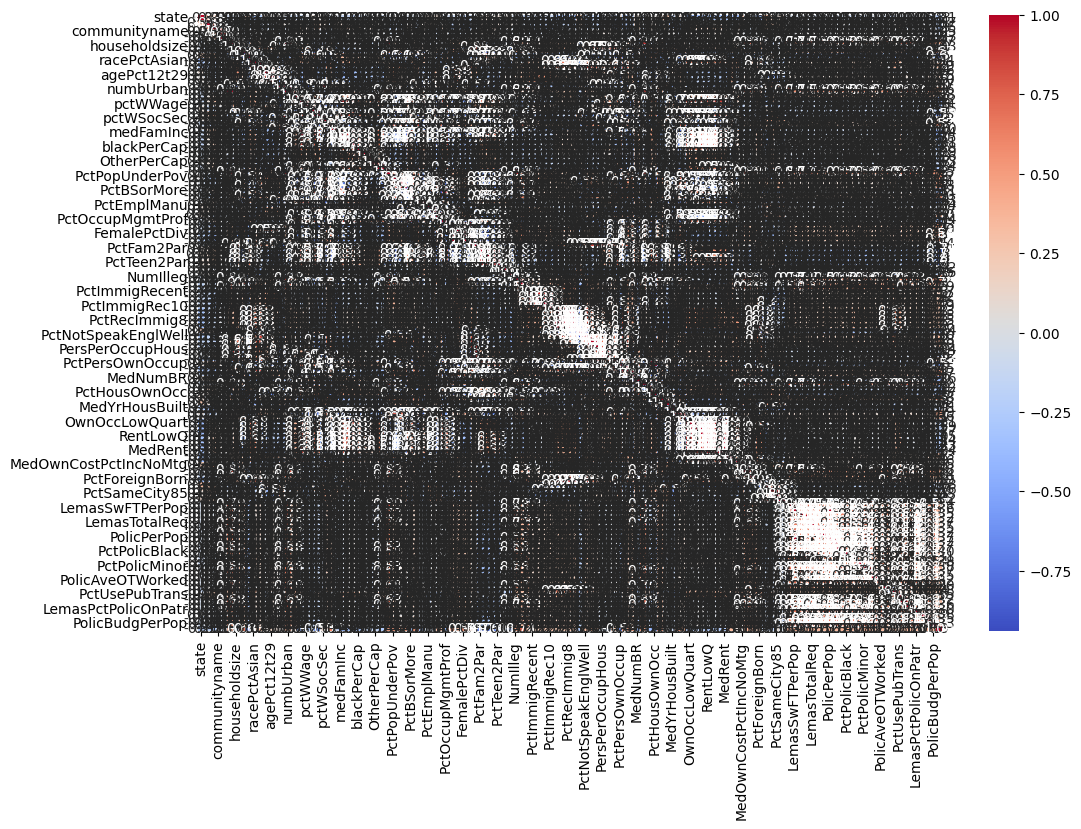

In [17]:
data_with_target = pd.concat([X, y], axis=1)

corr_matrix = data_with_target.corr()

target_corr = corr_matrix['ViolentCrimesPerPop'].sort_values(ascending=False)
print(target_corr)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

In [18]:
# Pick of important features using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X, y)

feature_importances = rf.feature_importances_

important_features = pd.Series(feature_importances, index=X.columns)
important_features = important_features.sort_values(ascending=False)

print(important_features)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


PctIlleg              0.350266
PctKids2Par           0.192116
racePctWhite          0.028485
PctFam2Par            0.027488
NumIlleg              0.013565
                        ...   
RacialMatchCommPol    0.000485
LemasSwFTPerPop       0.000422
PolicReqPerOffic      0.000321
MedNumBR              0.000234
LemasSwornFT          0.000200
Length: 127, dtype: float64


In [19]:
# Pick of important features using GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb.fit(X_train, y_train)

feature_importances = gb.feature_importances_

important_features = pd.Series(feature_importances, index=X_train.columns)
important_features = important_features.sort_values(ascending=False)

print(important_features)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


PctKids2Par      0.305096
PctIlleg         0.231163
NumIlleg         0.053580
racePctWhite     0.044505
PctFam2Par       0.028221
                   ...   
PctPolicAsian    0.000000
PctPolicHisp     0.000000
medFamInc        0.000000
PctRecImmig10    0.000000
PctRecImmig8     0.000000
Length: 127, dtype: float64


In [20]:
# Pick of important features using SelectFromModel
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rf, threshold="mean", max_features=10)

selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

selected_features = X_train.columns[selector.get_support()]
print("Wybrane cechy:", selected_features)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Wybrane cechy: Index(['racePctWhite', 'MalePctDivorce', 'FemalePctDiv', 'PctFam2Par',
       'PctKids2Par', 'NumIlleg', 'PctIlleg', 'PctPersDenseHous',
       'PctVacantBoarded', 'NumStreet'],
      dtype='object')


In [21]:

print(y_train.shape)


(1495, 1)


In [22]:
print("Wymiary zbioru treningowego (X_train):", X_train.shape)
print("Wymiary zbioru testowego (X_test):", X_test.shape)
# Pobranie masek cech
mask = selector.get_support()  # True dla wybranych cech, False dla pozostałych

# Usunięcie niewybranych cech z X_train i X_test
X_train_reduced = X_train.loc[:, mask]
X_test_reduced = X_test.loc[:, mask]

print("Zredukowane dane treningowe:\n", X_train_reduced.shape)
print("Zredukowane dane testowe:\n", X_test_reduced.shape)
print("Wymiary zbioru treningowego (X_train):", X_train.shape)
print("Wymiary zbioru testowego (X_test):", X_test.shape)

Wymiary zbioru treningowego (X_train): (1495, 127)
Wymiary zbioru testowego (X_test): (499, 127)
Zredukowane dane treningowe:
 (1495, 10)
Zredukowane dane testowe:
 (499, 10)
Wymiary zbioru treningowego (X_train): (1495, 127)
Wymiary zbioru testowego (X_test): (499, 127)


In [23]:
print("Liczba próbek w y_train:", y_train.shape[0])
print("Liczba próbek w y_test:", y_test.shape[0])


Liczba próbek w y_train: 1495
Liczba próbek w y_test: 499


In [24]:
# Pick of important features using LassoCV
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=42)

lasso.fit(X, y)

lasso_coef = pd.Series(lasso.coef_, index=X.columns)

selected_features = lasso_coef[lasso_coef != 0]
print("Wybrane cechy przez Lasso:", selected_features)

Wybrane cechy przez Lasso: state                 -0.001509
county                -0.000520
community             -0.000126
communityname          0.000002
racepctblack           0.014903
racePctWhite          -0.024962
OtherPerCap           -0.000308
PctKids2Par           -0.051879
PctIlleg               0.240975
LemasSwFTFieldOps      0.000664
LemasTotalReq          0.003321
LemasTotReqPerPop      0.001233
PolicReqPerOffic      -0.000081
PolicPerPop            0.001789
PctPolicWhite          0.000035
PctPolicBlack          0.002385
PctPolicHisp           0.001135
PctPolicMinor          0.000640
OfficAssgnDrugUnits    0.001069
PolicAveOTWorked      -0.000076
PolicOperBudg          0.000228
LemasPctPolicOnPatr   -0.000837
dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# Pick of important features using Univariate Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest # Importing SelectKBest

selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Wybrane cechy:", selected_features)

Wybrane cechy: Index(['racepctblack', 'racePctWhite', 'pctWInvInc', 'FemalePctDiv',
       'TotalPctDiv', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
       'PctTeen2Par', 'PctIlleg'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Prediction

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#print(X.isnull().sum())

In [27]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

rf_predictions = rf.predict(X_test_scaled)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest MAE: {rf_mae:.4f}")
print(f"Random Forest MSE: {rf_mse:.4f}")
print(f"Random Forest R^2: {rf_r2:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MAE: 0.0908
Random Forest MSE: 0.0170
Random Forest R^2: 0.6504


In [28]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)

gb_predictions = gb.predict(X_test_scaled)

gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print(f"Gradient Boosting MAE: {gb_mae:.4f}")
print(f"Gradient Boosting MSE: {gb_mse:.4f}")
print(f"Gradient Boosting R^2: {gb_r2:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting MAE: 0.0885
Gradient Boosting MSE: 0.0170
Gradient Boosting R^2: 0.6496


In [29]:
# Lasso (Lasso Regression)
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

lasso_predictions = lasso.predict(X_test_scaled)

lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print(f"Lasso MAE: {lasso_mae:.4f}")
print(f"Lasso MSE: {lasso_mse:.4f}")
print(f"Lasso R^2: {lasso_r2:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:1659: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011502343059497377, tolerance: 0.006407335953177259
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014179573305646898, tolerance: 0.006407335953177259
  model = cd_fast.enet_coordinate_descent_gram(


Lasso MAE: 0.0935
Lasso MSE: 0.0173
Lasso R^2: 0.6444


In [30]:
# LinearRegression
from sklearn.linear_model import LinearRegression

logreg = LinearRegression()
logreg.fit(X_train_scaled, y_train)

logreg_predictions = logreg.predict(X_test_scaled)

logreg_mae = mean_absolute_error(y_test, logreg_predictions)
logreg_mse = mean_squared_error(y_test, logreg_predictions)
logreg_r2 = r2_score(y_test, logreg_predictions)

print(f"Logistic Regression MAE: {logreg_mae:.4f}")
print(f"Logistic Regression MSE: {logreg_mse:.4f}")
print(f"Logistic Regression R^2: {logreg_r2:.4f}")

Logistic Regression MAE: 0.0968
Logistic Regression MSE: 0.0180
Logistic Regression R^2: 0.6293


In [31]:
# NeuralNetwork
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

mlp_predictions = mlp.predict(X_test_scaled)

mlp_mae = mean_absolute_error(y_test, mlp_predictions)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_r2 = r2_score(y_test, mlp_predictions)

print(f"Neural Network MAE: {mlp_mae:.4f}")
print(f"Neural Network MSE: {mlp_mse:.4f}")
print(f"Neural Network R^2: {mlp_r2:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network MAE: 0.1440
Neural Network MSE: 0.0368
Neural Network R^2: 0.2433


In [32]:
model_names = ['Random Forest', 'Gradient Boosting', 'Lasso', 'Logistic Regression', 'Neural Network']
mae_values = [rf_mae, gb_mae, lasso_mae, logreg_mae, mlp_mae]
mse_values = [rf_mse, gb_mse, lasso_mse, logreg_mse, mlp_mse]
r2_values = [rf_r2, gb_r2, lasso_r2, logreg_r2, mlp_r2]

results = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_values,
    'MSE': mse_values,
    'R^2': r2_values
})

print(results)

                 Model       MAE       MSE       R^2
0        Random Forest  0.090818  0.016999  0.650410
1    Gradient Boosting  0.088522  0.017039  0.649571
2                Lasso  0.093548  0.017290  0.644417
3  Logistic Regression  0.096820  0.018027  0.629265
4       Neural Network  0.144036  0.036795  0.243270


In [33]:
prediction = gb.predict(X_test_scaled[5].reshape(1, -1))
print(X_test_scaled[5].reshape(1, -1))
print(prediction)

[[ 1.61222551  2.46675936  2.13496998  1.24297317  1.21499136 -0.30310471
  -0.42061052 -0.67794527  0.94305198 -0.59223056 -0.49669752 -0.53009715
  -0.30307259 -0.4545275   0.35373962 -0.27646108  0.67213415 -0.07980386
  -0.02072102 -0.94633976  1.10919571  0.44236593 -0.58340974  1.15536226
  -0.1618695  -0.3117125  -0.47159982 -0.35359199 -0.16637919 -0.40704566
  -0.78925951 -0.25332068 -0.35977636 -0.82877619 -0.2648316  -0.1742683
  -0.67395983 -0.52238573  0.24050151  1.55200185 -0.39447021  0.64446658
  -0.86053871 -0.0931164  -0.31171249 -0.71246116 -0.44000594 -0.34990523
   0.27057983  0.50947573  0.91752106  0.1804345   0.64627903  0.94186435
  -0.24786795 -0.57820302 -0.33788006 -1.18810311 -1.3432693  -1.40518711
  -1.50774635 -0.72872905 -0.73157386 -0.69884648 -0.69717879  0.45618289
  -0.37044064 -0.60545172 -0.53657854 -0.27794091  0.24733618 -0.75447652
   0.15254772 -0.51973681 -0.12451833  0.76582289 -0.45199798  1.07937618
  -0.09006916 -0.76016408  0.70352263 -

In [34]:
y.iloc[1]

,1
ViolentCrimesPerPop,0.67


In [35]:
print(y_train.shape)
print(y_test.shape)
print("Zredukowane dane treningowe:\n", X_train_reduced.shape)
print("Zredukowane dane testowe:\n", X_test_reduced.shape)
print("Wymiary zbioru treningowego (X_train):", X_train.shape)
print("Wymiary zbioru testowego (X_test):", X_test.shape)

(1495, 1)
(499, 1)
Zredukowane dane treningowe:
 (1495, 10)
Zredukowane dane testowe:
 (499, 10)
Wymiary zbioru treningowego (X_train): (1495, 127)
Wymiary zbioru testowego (X_test): (499, 127)


In [36]:
X_train_scaled

array([[-0.63707468, -0.55087527, -0.64520035, ...,  1.64959518,
         2.37995818,  4.42129965],
       [ 0.82193085,  0.26746633,  2.27955536, ..., -0.17447641,
        -0.40722427, -0.34733487],
       [ 1.18668223, -0.55087527, -0.64520035, ..., -0.17447641,
        -0.40722427, -0.34733487],
       ...,
       [ 0.82193085,  2.00644221,  0.8130465 , ..., -0.17447641,
        -0.40722427, -0.34733487],
       [-1.36657745, -0.55087527, -0.64520035, ..., -0.17447641,
        -0.40722427, -0.34733487],
       [-1.36657745, -0.55087527, -0.64520035, ..., -0.17447641,
        -0.40722427, -0.34733487]])

In [37]:
#1h
#Dane orginalne
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

# Zbiór wyników
model_results = []

# Funkcja dostrajania i oceny modeli
def tune_and_evaluate_model(model, param_grid, model_name, X_train, y_train, X_test, y_test, grid_search=True):
    print(f"Tuning {model_name}...")

    if grid_search:
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=5,
            scoring='neg_mean_absolute_error',
            verbose=2,
            n_jobs=-1
        )
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        best_model = model
        best_params = None

    train_time = end_time - start_time

    # Predykcja i ocena
    predictions = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Dodanie wyników do zbioru
    model_results.append({
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'R^2': r2,
        'Training Time (s)': train_time,
        'Best Params': best_params,
        'Predictions': predictions
    })

    print(f"Done with {model_name}!")
    return predictions

# Random Forest - Parametry
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_predictions = tune_and_evaluate_model(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    "RandomForest",
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test
)

# Gradient Boosting - Parametry
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
gb_predictions = tune_and_evaluate_model(
    GradientBoostingRegressor(random_state=42),
    gb_param_grid,
    "GradientBoosting",
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test
)

# Lasso - Parametry
lasso_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}
lasso_predictions = tune_and_evaluate_model(
    Lasso(random_state=42),
    lasso_param_grid,
    "Lasso",
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test
)

# Linear Regression (bez GridSearch)
lr_predictions = tune_and_evaluate_model(
    LinearRegression(),
    None,
    "LinearRegression",
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
    grid_search=False
)

# Neural Network - Parametry
mlp_param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64)],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [300, 500]
}
mlp_predictions = tune_and_evaluate_model(
    MLPRegressor(random_state=42),
    mlp_param_grid,
    "NeuralNetwork",
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test
)

# Podsumowanie wyników w tabeli
results_df = pd.DataFrame(model_results).drop(columns=['Predictions'])
print(results_df.sort_values(by='MAE', ascending=False))



Tuning RandomForest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Done with RandomForest!
Tuning GradientBoosting...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Done with GradientBoosting!
Tuning Lasso...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Done with Lasso!
Tuning LinearRegression...
Done with LinearRegression!
Tuning NeuralNetwork...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Done with NeuralNetwork!
              Model       MAE       MSE       R^2  Training Time (s)  \
4     NeuralNetwork  0.111767  0.028371  0.416531          34.717157   
3  LinearRegression  0.096820  0.018027  0.629265           0.125348   
0      RandomForest  0.089539  0.016766  0.655202        1976.218033   
1  GradientBoosting  0.089385  0.017151  0.647285        1210.655389   
2             Lasso  0.089282  0.016576  0.659106           0.290380   

                                         Best Params  
4  {'hidden_layer_sizes': (128, 64), 'learning_ra...  
3                                               None  
0  {'max_depth': 20, 'min_samples_leaf': 2, 'min_...  
1  {'learning_rate': 0.1, 'max_depth': 3, 'min_sa...  
2                                    {'alpha': 0.01}  


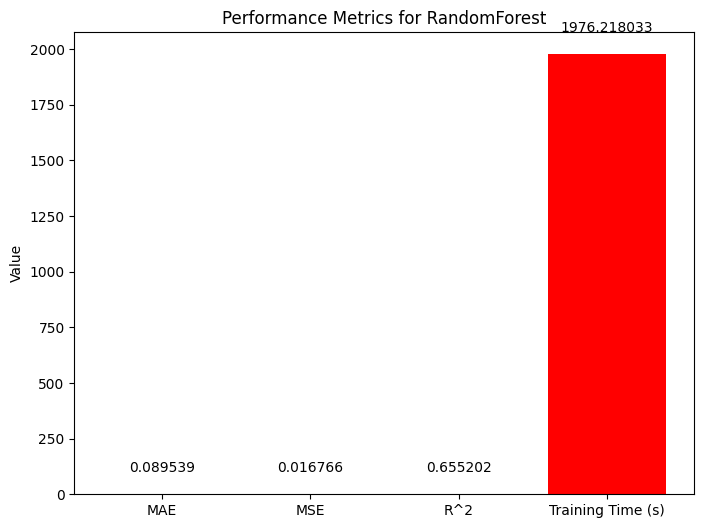

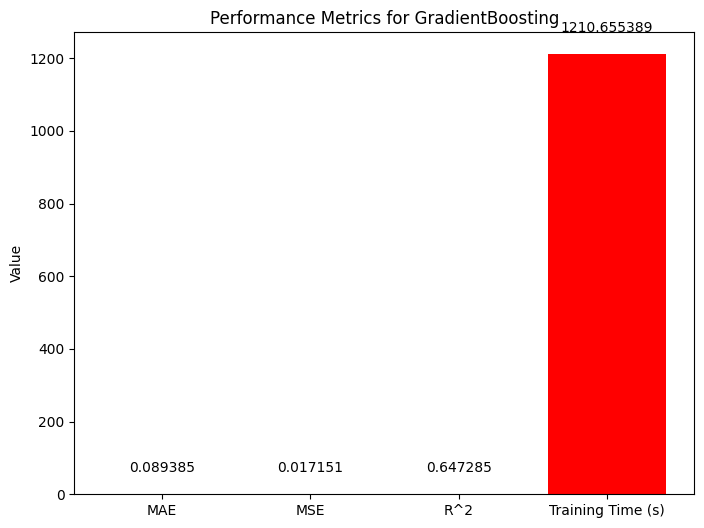

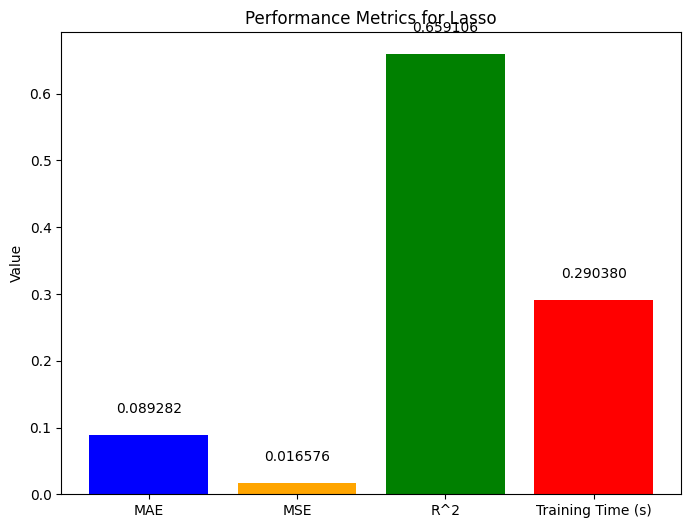

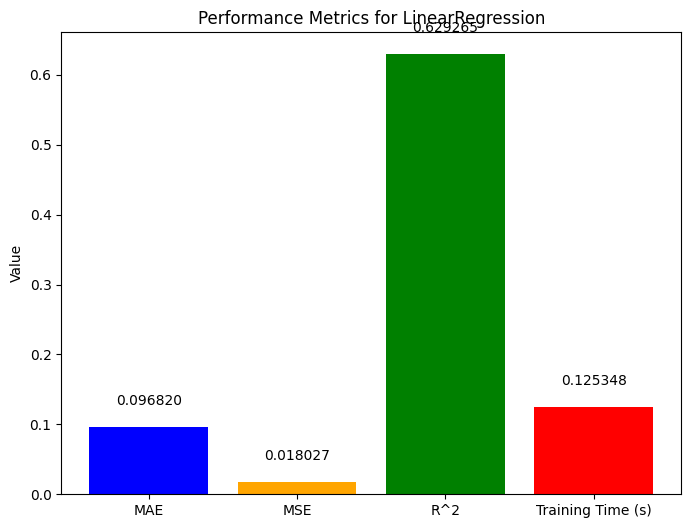

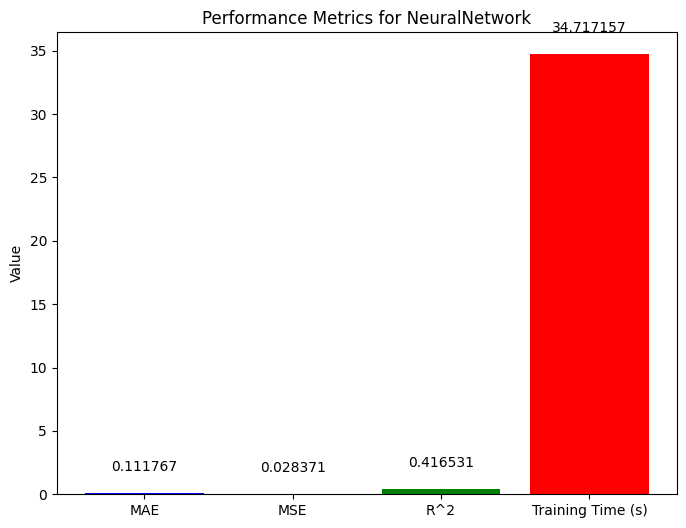

In [38]:
import matplotlib.pyplot as plt

# Funkcja do tworzenia wykresów dla każdego modelu
def plot_model_results(results_df):
    # Iteracja po każdym modelu
    for index, row in results_df.iterrows():
        model_name = row['Model']
        metrics = ['MAE', 'MSE', 'R^2', 'Training Time (s)']
        values = [row['MAE'], row['MSE'], row['R^2'], row['Training Time (s)']]

        # Tworzenie wykresu
        plt.figure(figsize=(8, 6))
        plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
        plt.title(f'Performance Metrics for {model_name}')
        plt.ylabel('Value')
        for i, v in enumerate(values):
            plt.text(i, v + 0.05 * max(values), f'{v:.6f}', ha='center', fontsize=10)

        # Zapis wykresu lub jego wyświetlenie
        plt.savefig(f'{model_name}_metrics.png')
        plt.show()

# Generowanie wykresów
plot_model_results(results_df)


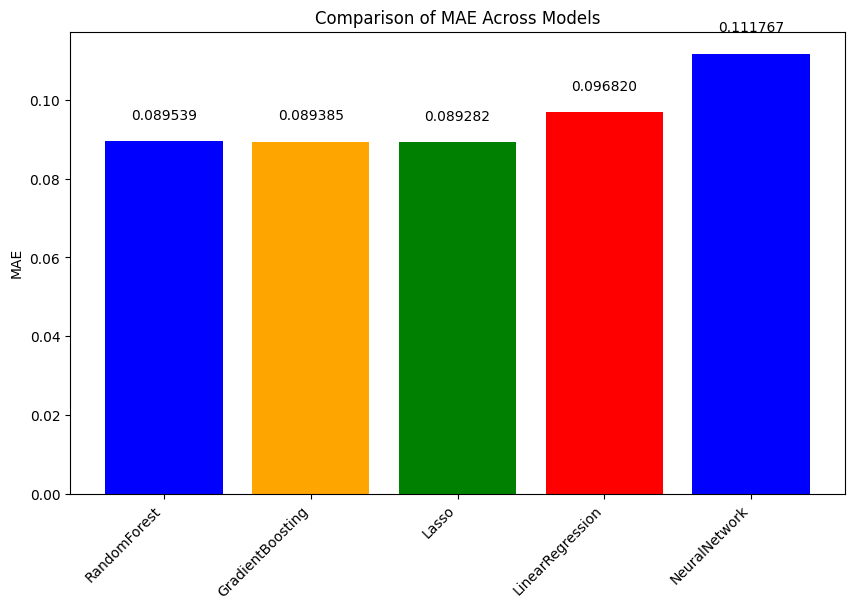

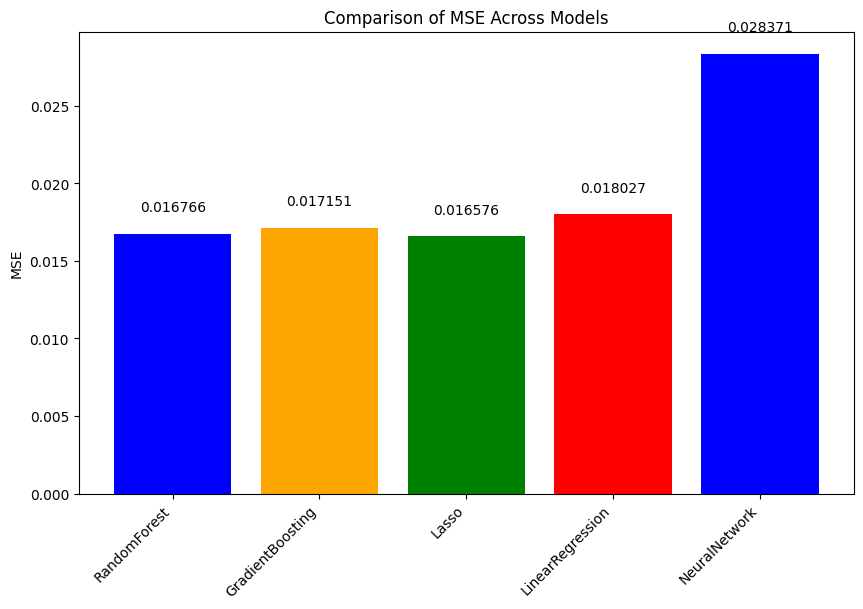

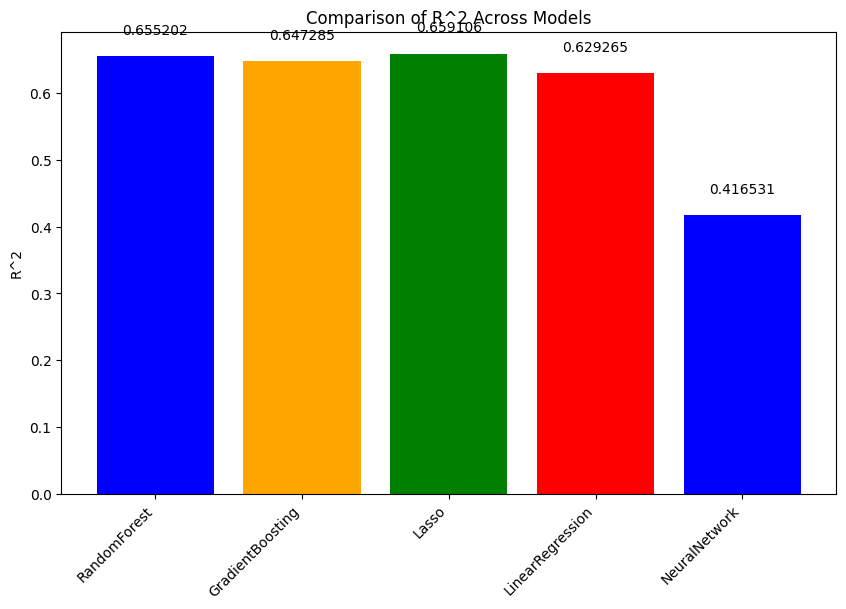

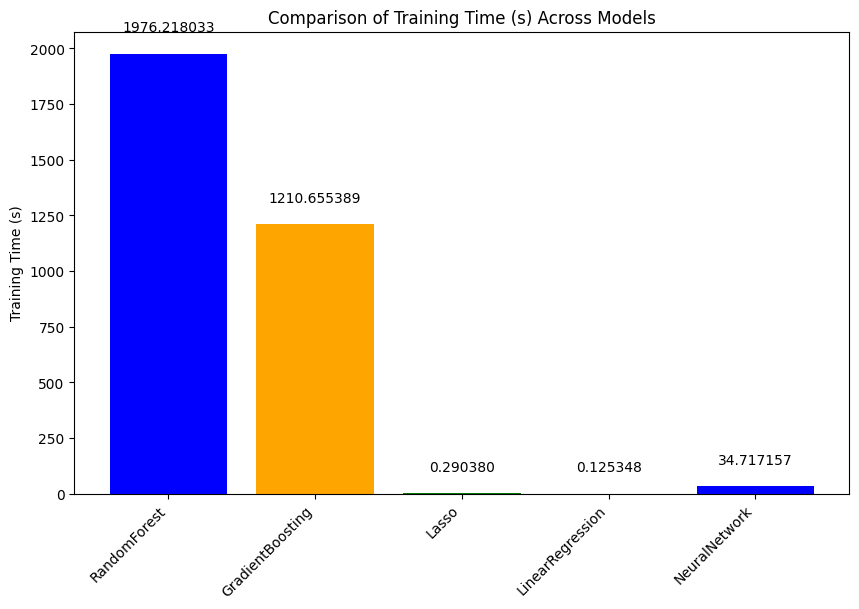

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create plots for each metric, comparing all models
def plot_metric_comparisons(results_df):
    metrics = ['MAE', 'MSE', 'R^2', 'Training Time (s)']

    for metric in metrics:
        # Extract data for the current metric
        metric_values = results_df[metric]
        models = results_df['Model']

        # Create the bar plot
        plt.figure(figsize=(10, 6))
        plt.bar(models, metric_values, color=['blue', 'orange', 'green', 'red'])
        plt.title(f'Comparison of {metric} Across Models')
        plt.ylabel(metric)
        plt.xticks(rotation=45, ha='right')  # Rotate model names for better readability

        # Add values above bars
        for i, v in enumerate(metric_values):
            plt.text(i, v + 0.05 * max(metric_values), f'{v:.6f}', ha='center', fontsize=10)

        # Save or display the plot
        plt.savefig(f'comparison_{metric}.png')
        plt.show()

# Example usage with results_df
plot_metric_comparisons(results_df)

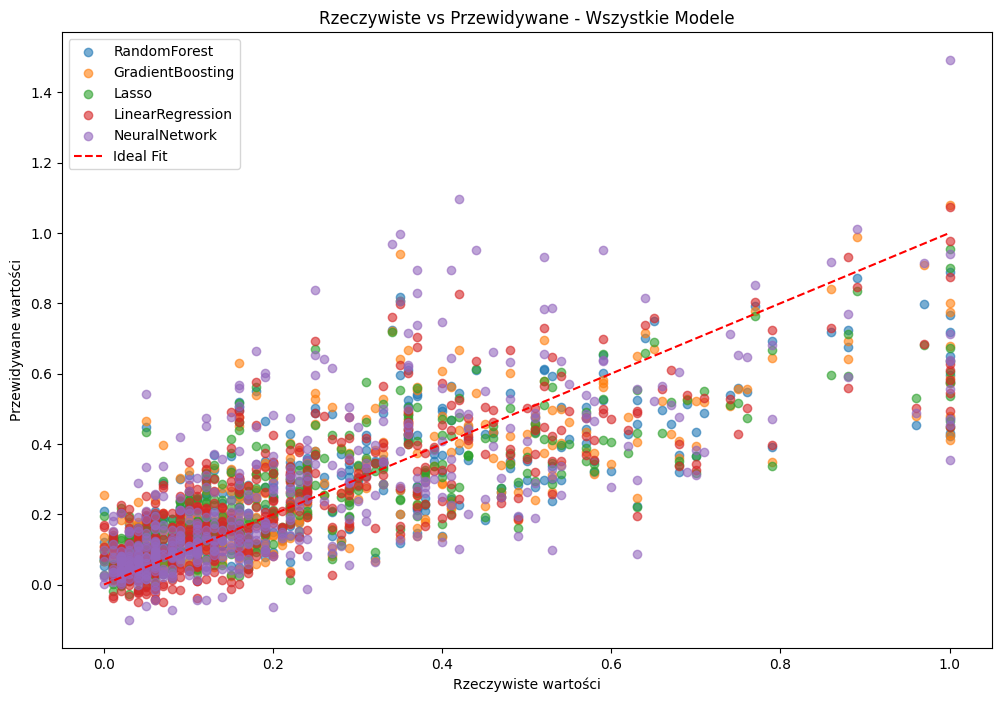

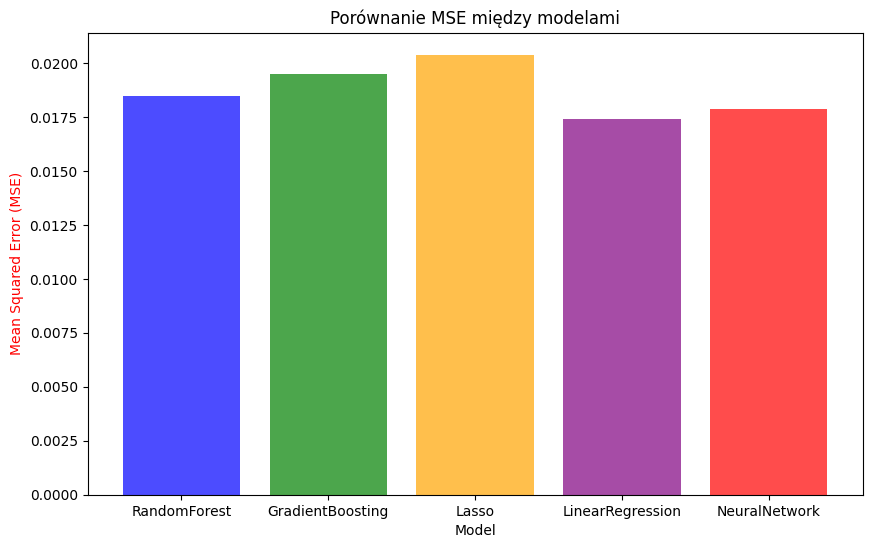

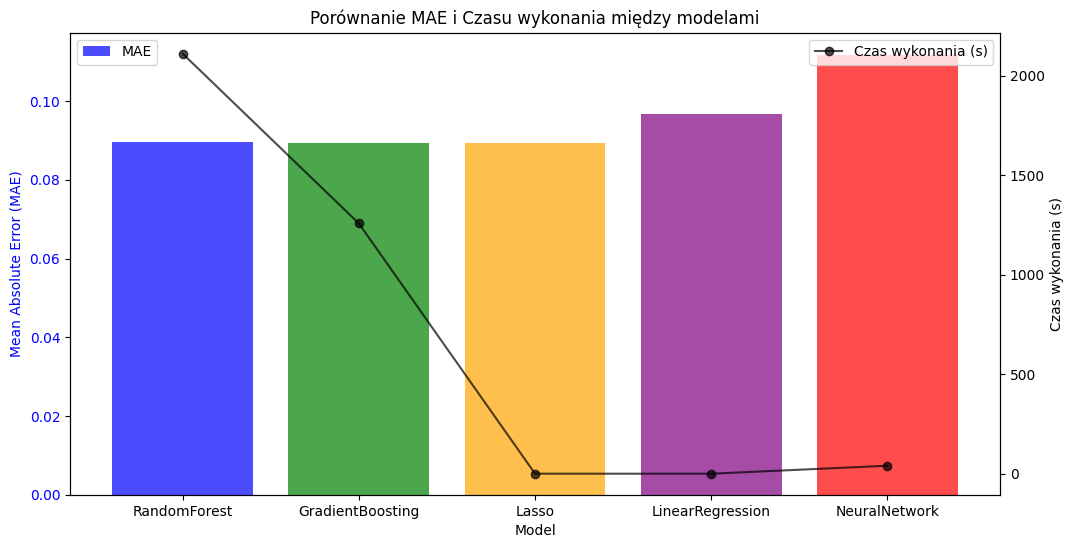

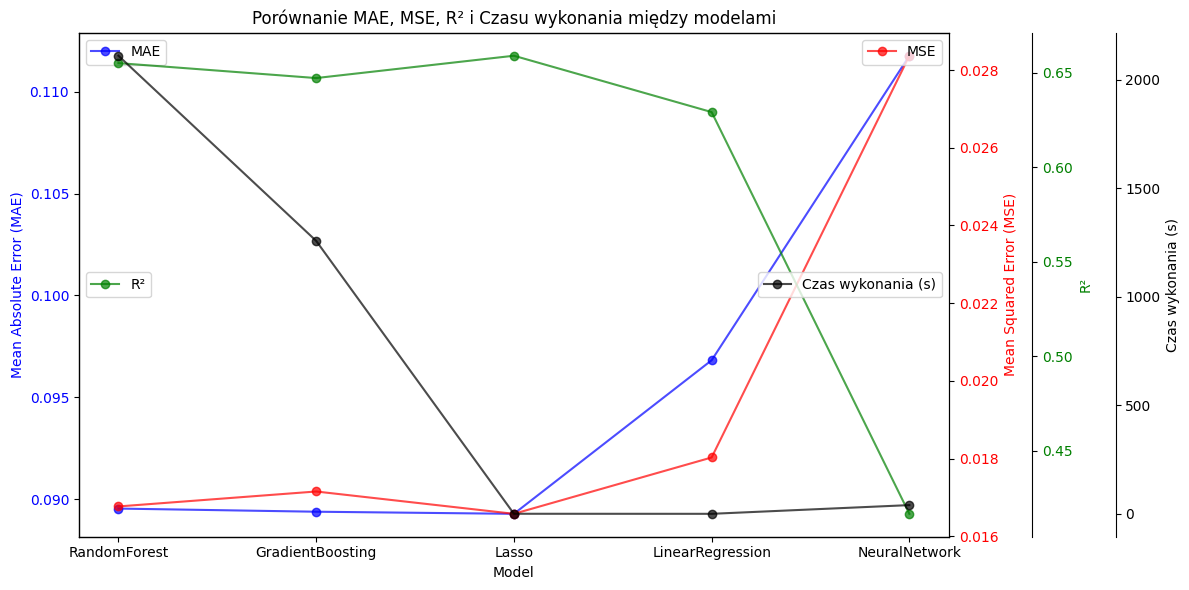

In [ ]:

# Wizualizacja wyników
plt.figure(figsize=(12, 8))
for result in model_results:
    plt.scatter(y_test, result['Predictions'], alpha=0.6, label=result['Model'])

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Przewidywane wartości")
plt.title("Rzeczywiste vs Przewidywane - Wszystkie Modele")
plt.legend()
plt.show()


# Wizualizacja MSE jako wykres słupkowy
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values,  color=['blue', 'green', 'orange', 'purple', 'red'], alpha=0.7)
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)", color='red')
plt.title("Porównanie MSE między modelami")
plt.show()

# Wizualizacja MAE oraz Czasu Wykonywania Modelu
model_names = [result['Model'] for result in model_results]
mae_values = [result['MAE'] for result in model_results]
train_times = [result['Training Time (s)'] for result in model_results]

# Utworzenie wykresu
fig, ax1 = plt.subplots(figsize=(12, 6))

# Wykres MAE
ax1.bar(model_names, mae_values, color=['blue', 'green', 'orange', 'purple', 'red'], alpha=0.7, label='MAE')
ax1.set_xlabel("Model")
ax1.set_ylabel("Mean Absolute Error (MAE)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Tworzenie drugiej osi y do wyświetlenia czasu wykonania
ax2 = ax1.twinx()
ax2.plot(model_names, train_times, color='black', marker='o', linestyle='-', label='Czas wykonania (s)', alpha=0.7)
ax2.set_ylabel("Czas wykonania (s)", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Dodanie tytułu
plt.title("Porównanie MAE i Czasu wykonania między modelami")

# Pokaż legendę
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Pokazanie wykresu
plt.show()


model_names = [result['Model'] for result in model_results]
mae_values = [result['MAE'] for result in model_results]
mse_values = [result['MSE'] for result in model_results]
r2_values = [result['R^2'] for result in model_results]
train_times = [result['Training Time (s)'] for result in model_results]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(model_names, mae_values, color='blue', marker='o', linestyle='-', label='MAE', alpha=0.7)
ax1.set_xlabel("Model")
ax1.set_ylabel("Mean Absolute Error (MAE)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(model_names, mse_values, color='red', marker='o', linestyle='-', label='MSE', alpha=0.7)
ax2.set_ylabel("Mean Squared Error (MSE)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(model_names, r2_values, color='green', marker='o', linestyle='-', label='R²', alpha=0.7)
ax3.set_ylabel("R²", color='green')
ax3.tick_params(axis='y', labelcolor='green')

ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
ax4.plot(model_names, train_times, color='black', marker='o', linestyle='-', label='Czas wykonania (s)', alpha=0.7)
ax4.set_ylabel("Czas wykonania (s)", color='black')
ax4.tick_params(axis='y', labelcolor='black')

plt.title("Porównanie MAE, MSE, R² i Czasu wykonania między modelami")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center left')
ax4.legend(loc='center right')

plt.tight_layout()
plt.show()


In [ ]:
#3h
#dane zredukowane
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

# Zbiór wyników
model_results = []

# Funkcja dostrajania i oceny modeli
def tune_and_evaluate_model(model, param_grid, model_name, X_train, y_train, X_test, y_test, grid_search=True):
    print(f"Tuning {model_name}...")

    if grid_search:
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=5,
            scoring='neg_mean_absolute_error',
            verbose=2,
            n_jobs=-1
        )
        start_time = time.time()
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        best_model = model
        best_params = None

    train_time = end_time - start_time

    # Predykcja i ocena
    predictions = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Dodanie wyników do zbioru
    model_results.append({
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'R^2': r2,
        'Training Time (s)': train_time,
        'Best Params': best_params,
        'Predictions': predictions
    })

    print(f"Done with {model_name}!")
    return predictions

# Random Forest - Parametry
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}
rf_predictions = tune_and_evaluate_model(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    "RandomForest",
    X_train_reduced,
    y_train,
    X_test_reduced,
    y_test
)

# Gradient Boosting - Parametry
gb_param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}
gb_predictions = tune_and_evaluate_model(
    GradientBoostingRegressor(random_state=42),
    gb_param_grid,
    "GradientBoosting",
    X_train_reduced,
    y_train,
    X_test_reduced,
    y_test
)

# Lasso - Parametry
lasso_param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, 50.0, 100.0, 500.0],
}
lasso_predictions = tune_and_evaluate_model(
    Lasso(random_state=42),
    lasso_param_grid,
    "Lasso",
    X_train_reduced,
    y_train,
    X_test_reduced,
    y_test
)

# Linear Regression (bez GridSearch)
lr_predictions = tune_and_evaluate_model(
    LinearRegression(),
    None,
    "LinearRegression",
    X_train_reduced,
    y_train,
    X_test_reduced,
    y_test,
    grid_search=False
)

# Neural Network - Parametry
mlp_param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64), (128, 128), (256, 128)],
    'learning_rate_init': [0.001, 0.005, 0.01, 0.1],
    'max_iter': [300, 500, 1000, 2000],
}
mlp_predictions = tune_and_evaluate_model(
    MLPRegressor(random_state=42),
    mlp_param_grid,
    "NeuralNetwork",
    X_train_reduced,
    y_train,
    X_test_reduced,
    y_test
)



pd.set_option('display.max_colwidth', None)
# Podsumowanie wyników w tabeli
results_df = pd.DataFrame(model_results).drop(columns=['Predictions'])
print(results_df.sort_values(by='MAE', ascending=False))


Tuning RandomForest...
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Done with RandomForest!
Tuning GradientBoosting...
Fitting 5 folds for each of 960 candidates, totalling 4800 fits


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Done with GradientBoosting!
Tuning Lasso...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Done with Lasso!
Tuning LinearRegression...
Done with LinearRegression!
Tuning NeuralNetwork...
Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Done with NeuralNetwork!
              Model       MAE       MSE       R^2  Training Time (s)  \
2             Lasso  0.106195  0.020387  0.580715           0.279493   
1  GradientBoosting  0.093699  0.019463  0.599730        8015.642522   
3  LinearRegression  0.092954  0.017422  0.641699           0.005808   
0      RandomForest  0.092705  0.018015  0.629501        4113.870932   
4     NeuralNetwork  0.088998  0.018356  0.622484         164.264993   

                                                                                                    Best Params  
2                                                                                               {'alpha': 0.01}  
1  {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}  
3                                                                                                          None  
0                         {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split'

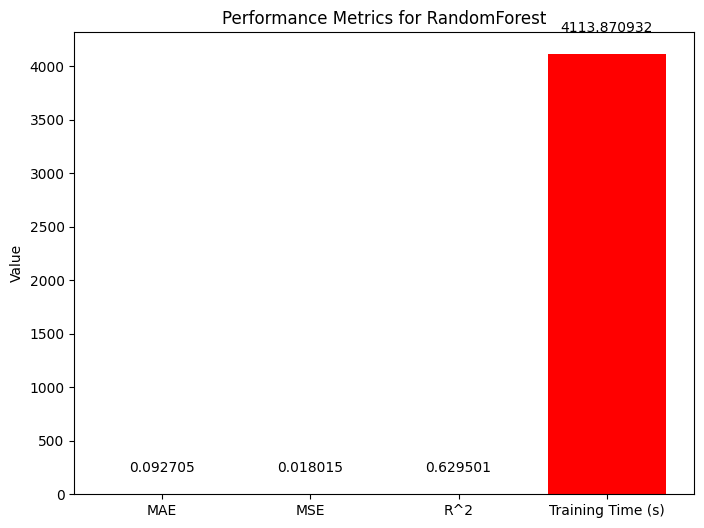

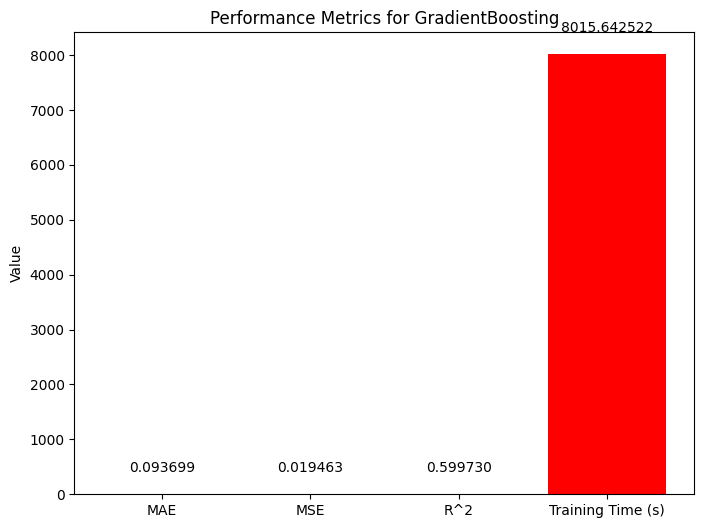

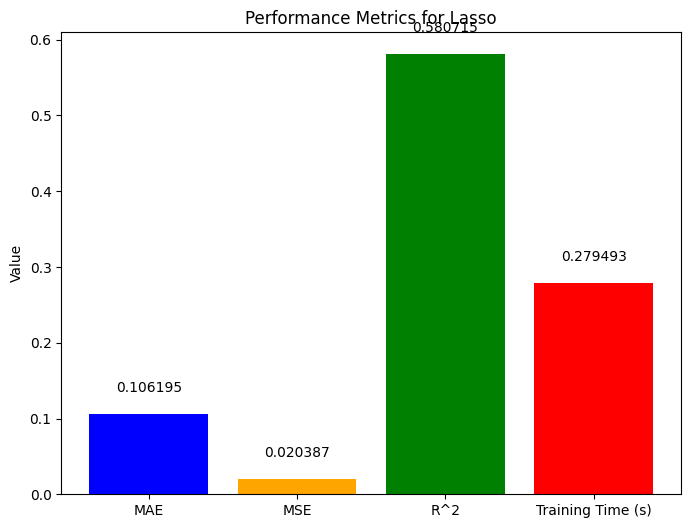

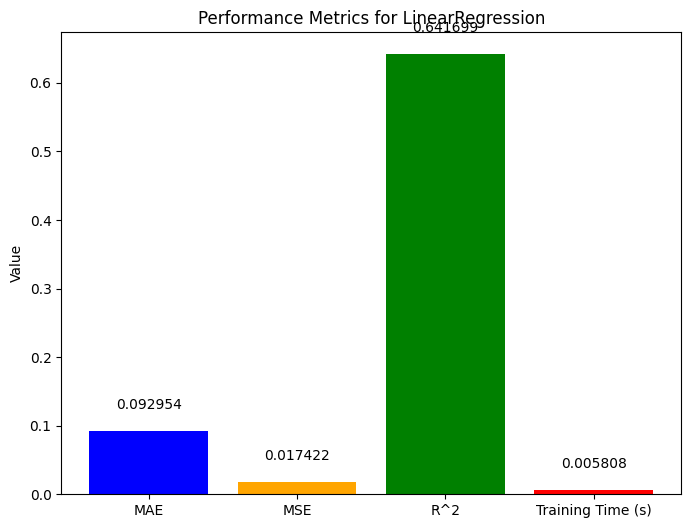

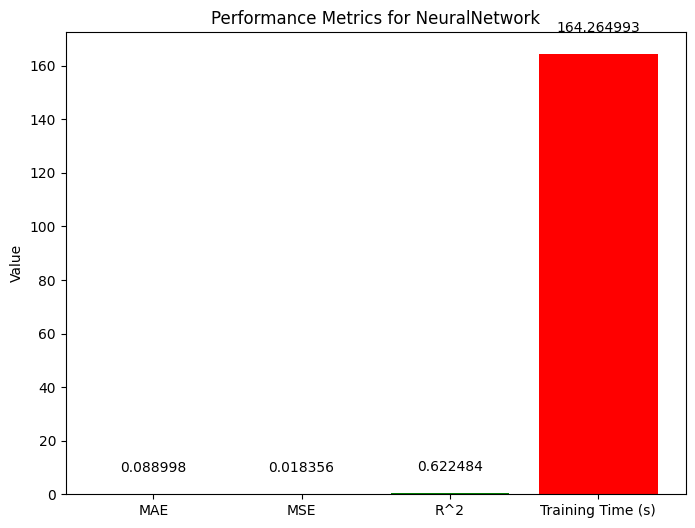

In [ ]:
import matplotlib.pyplot as plt

# Funkcja do tworzenia wykresów dla każdego modelu
def plot_model_results(results_df):
    # Iteracja po każdym modelu
    for index, row in results_df.iterrows():
        model_name = row['Model']
        metrics = ['MAE', 'MSE', 'R^2', 'Training Time (s)']
        values = [row['MAE'], row['MSE'], row['R^2'], row['Training Time (s)']]

        # Tworzenie wykresu
        plt.figure(figsize=(8, 6))
        plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
        plt.title(f'Performance Metrics for {model_name}')
        plt.ylabel('Value')
        for i, v in enumerate(values):
            plt.text(i, v + 0.05 * max(values), f'{v:.6f}', ha='center', fontsize=10)

        # Zapis wykresu lub jego wyświetlenie
        plt.savefig(f'{model_name}_metrics.png')
        plt.show()

# Generowanie wykresów
plot_model_results(results_df)


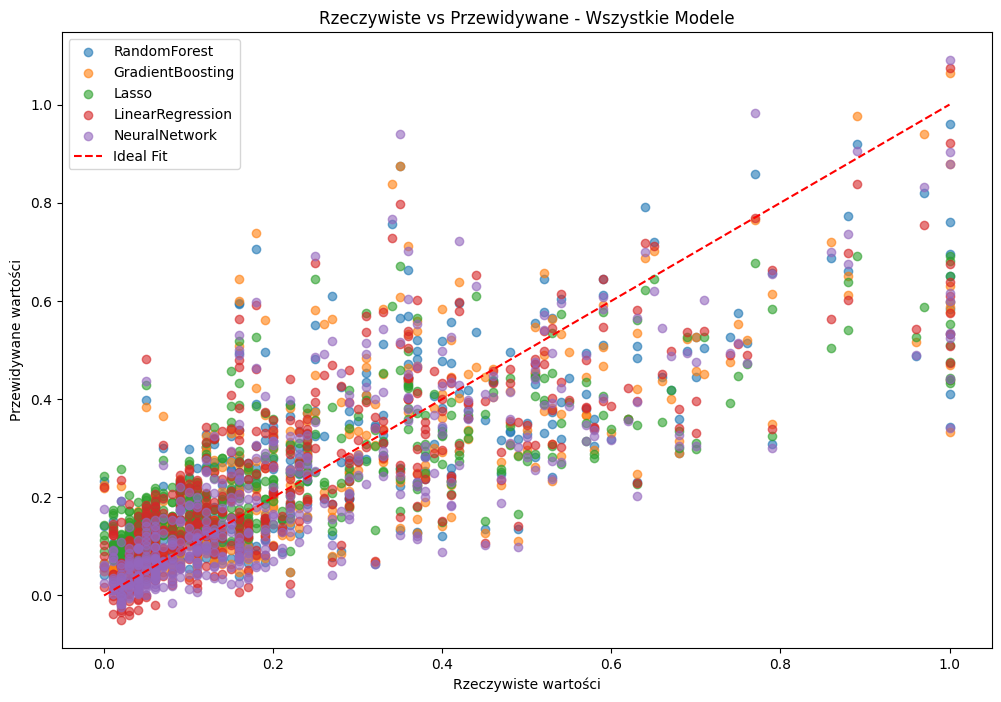

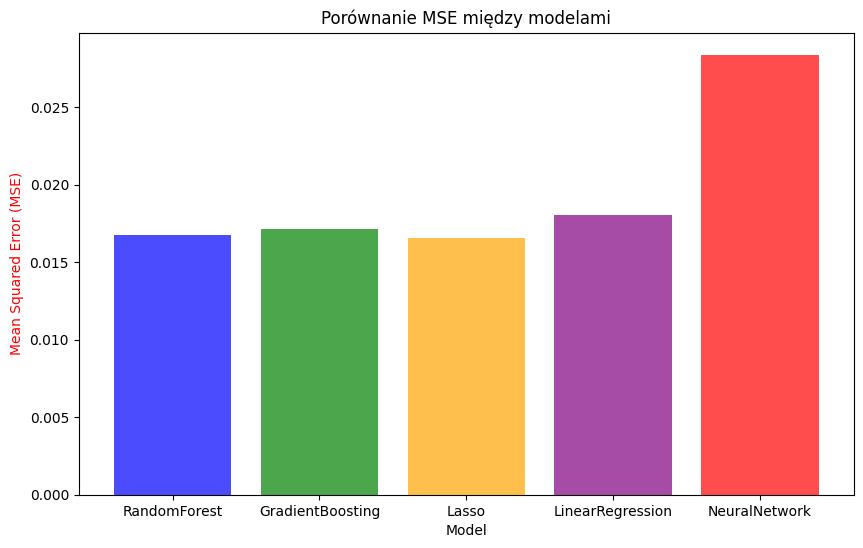

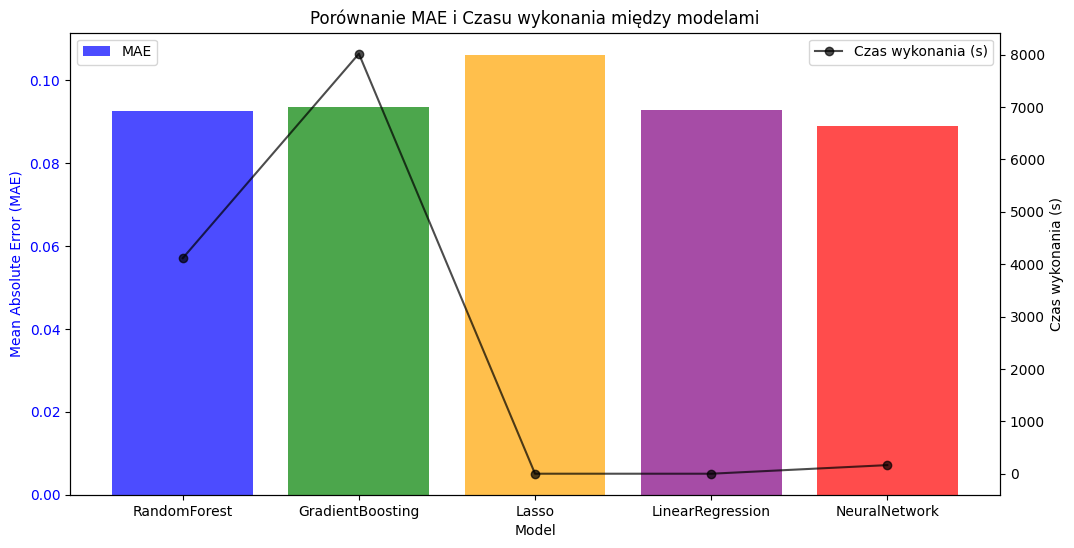

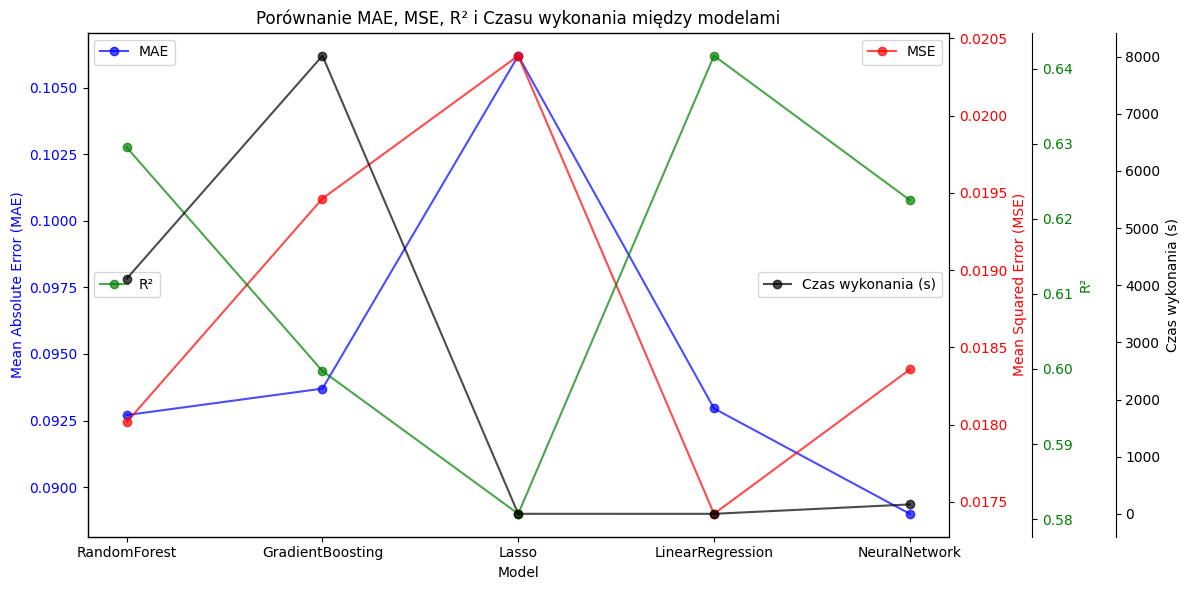

In [ ]:

# Wizualizacja wyników
plt.figure(figsize=(12, 8))
for result in model_results:
    plt.scatter(y_test, result['Predictions'], alpha=0.6, label=result['Model'])

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Przewidywane wartości")
plt.title("Rzeczywiste vs Przewidywane - Wszystkie Modele")
plt.legend()
plt.show()


# Wizualizacja MSE jako wykres słupkowy
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values,  color=['blue', 'green', 'orange', 'purple', 'red'], alpha=0.7)
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)", color='red')
plt.title("Porównanie MSE między modelami")
plt.show()

# Wizualizacja MAE oraz Czasu Wykonywania Modelu
model_names = [result['Model'] for result in model_results]
mae_values = [result['MAE'] for result in model_results]
train_times = [result['Training Time (s)'] for result in model_results]

# Utworzenie wykresu
fig, ax1 = plt.subplots(figsize=(12, 6))

# Wykres MAE
ax1.bar(model_names, mae_values, color=['blue', 'green', 'orange', 'purple', 'red'], alpha=0.7, label='MAE')
ax1.set_xlabel("Model")
ax1.set_ylabel("Mean Absolute Error (MAE)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Tworzenie drugiej osi y do wyświetlenia czasu wykonania
ax2 = ax1.twinx()
ax2.plot(model_names, train_times, color='black', marker='o', linestyle='-', label='Czas wykonania (s)', alpha=0.7)
ax2.set_ylabel("Czas wykonania (s)", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Dodanie tytułu
plt.title("Porównanie MAE i Czasu wykonania między modelami")

# Pokaż legendę
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Pokazanie wykresu
plt.show()


model_names = [result['Model'] for result in model_results]
mae_values = [result['MAE'] for result in model_results]
mse_values = [result['MSE'] for result in model_results]
r2_values = [result['R^2'] for result in model_results]
train_times = [result['Training Time (s)'] for result in model_results]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(model_names, mae_values, color='blue', marker='o', linestyle='-', label='MAE', alpha=0.7)
ax1.set_xlabel("Model")
ax1.set_ylabel("Mean Absolute Error (MAE)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(model_names, mse_values, color='red', marker='o', linestyle='-', label='MSE', alpha=0.7)
ax2.set_ylabel("Mean Squared Error (MSE)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(model_names, r2_values, color='green', marker='o', linestyle='-', label='R²', alpha=0.7)
ax3.set_ylabel("R²", color='green')
ax3.tick_params(axis='y', labelcolor='green')

ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
ax4.plot(model_names, train_times, color='black', marker='o', linestyle='-', label='Czas wykonania (s)', alpha=0.7)
ax4.set_ylabel("Czas wykonania (s)", color='black')
ax4.tick_params(axis='y', labelcolor='black')

plt.title("Porównanie MAE, MSE, R² i Czasu wykonania między modelami")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center left')
ax4.legend(loc='center right')

plt.tight_layout()
plt.show()
